In [16]:
import numpy as np
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random


import torch.nn.init
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
device = 'cuda' if torch.cuda.is_available else 'cpu'

torch.manual_seed(777)   #random value를 잡아주는? 항상 같은 random이 나오는 걸로 설명은 되어있으나 완벽하게 이해 못함 질문1
if device == 'cuda' : 
    torch.cuda.manual_seed_all(777)

In [18]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

# data 다운 되게 만드는 보안 헤더 코드???? 질문2

In [19]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [20]:
#parameters 정의해둠 > data loader에 써야되니까 batch size등
learning_rate = 0.001
training_epochs =15
batch_size = 100

In [21]:
data_loader = torch.utils.data.DataLoader(dataset =mnist_train,
                                         batch_size = batch_size,
                                          shuffle = True,
                                          drop_last = True)

In [22]:
class CNN(nn.Module) :
    
    def __init__(self) :
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,32,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        # fully connected layer
        self.fc = nn.Linear(7*7*64,10,bias=True)
        torch.nn.init.xavier_uniform_(self.fc.weight) #초기화진행
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        
        out = out.view(out.size(0),-1)
        out = self.fc(out)
        return out

In [23]:
model = CNN().to(device)

In [24]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [25]:
#training
total_batch = len(data_loader)

#final epoch loss accuracy report를 위한 리스트를 만든다!
list_epoch = [] 
list_train_loss = []
list_acc = []
list_acc_epoch = []

for epoch in range(training_epochs) :
    avg_cost = 0
    
    for X, Y in data_loader :
        X = X.to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = model(X)
        
        cost = criterion(hypothesis, Y)
        cost.backward()  
        optimizer.step()
        
        avg_cost += cost/total_batch 
        
        list_epoch.append(i)
        list_train_loss.append(loss.detach().numpy())
        
    print('[Epoch:{}] cost = {}'.format(epoch+1, avg_cost))
    
print('Learning Finished')

NameError: name 'list_epch' is not defined

In [11]:
with torch.no_grad():    #학습안할꺼니까 선언
    X_test = mnist_test.test_data.view(len(mnist_test),1,28,28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ',accuracy.item())

Accuracy :  0.9884999990463257


In [12]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

Label:  7
Prediction:  0


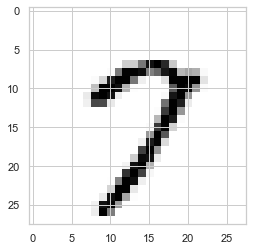

In [13]:
    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

In [ ]:

fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()